<center><img src="../../../images/linear_regression.png" alt="linear_regression" width="1000"/></center>

In [254]:
# For Data Operation 
import pandas as pd 
import numpy as np

# For Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# For ML Tasks 
from sklearn.model_selection import train_test_split , KFold , GridSearchCV
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet

# Linear Regression

In [327]:
data = pd.read_csv('../../../datasets/housing.csv')
data

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice
0,1,8450,7,2003,856,1710,2,3,Gd,8,548,208500
1,2,9600,6,1976,1262,1262,2,3,TA,6,460,181500
2,3,11250,7,2001,920,1786,2,3,Gd,6,608,223500
3,4,9550,7,1915,756,1717,1,3,Gd,7,642,140000
4,5,14260,8,2000,1145,2198,2,4,Gd,9,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,6,1999,953,1647,2,3,TA,7,460,175000
1456,1457,13175,6,1978,1542,2073,2,3,TA,7,500,210000
1457,1458,9042,7,1941,1152,2340,2,4,Gd,9,252,266500
1458,1459,9717,5,1950,1078,1078,1,2,Gd,5,240,142125


In [328]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1460 non-null   int64 
 1   LotArea       1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   YearBuilt     1460 non-null   int64 
 4   TotalBsmtSF   1460 non-null   int64 
 5   GrLivArea     1460 non-null   int64 
 6   FullBath      1460 non-null   int64 
 7   BedroomAbvGr  1460 non-null   int64 
 8   KitchenQual   1460 non-null   object
 9   TotRmsAbvGrd  1460 non-null   int64 
 10  GarageArea    1460 non-null   int64 
 11  SalePrice     1460 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 137.0+ KB


In [329]:
data.isnull().sum()

Id              0
LotArea         0
OverallQual     0
YearBuilt       0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
GarageArea      0
SalePrice       0
dtype: int64

In [332]:
data = pd.get_dummies(data,drop_first=True)

<Axes: >

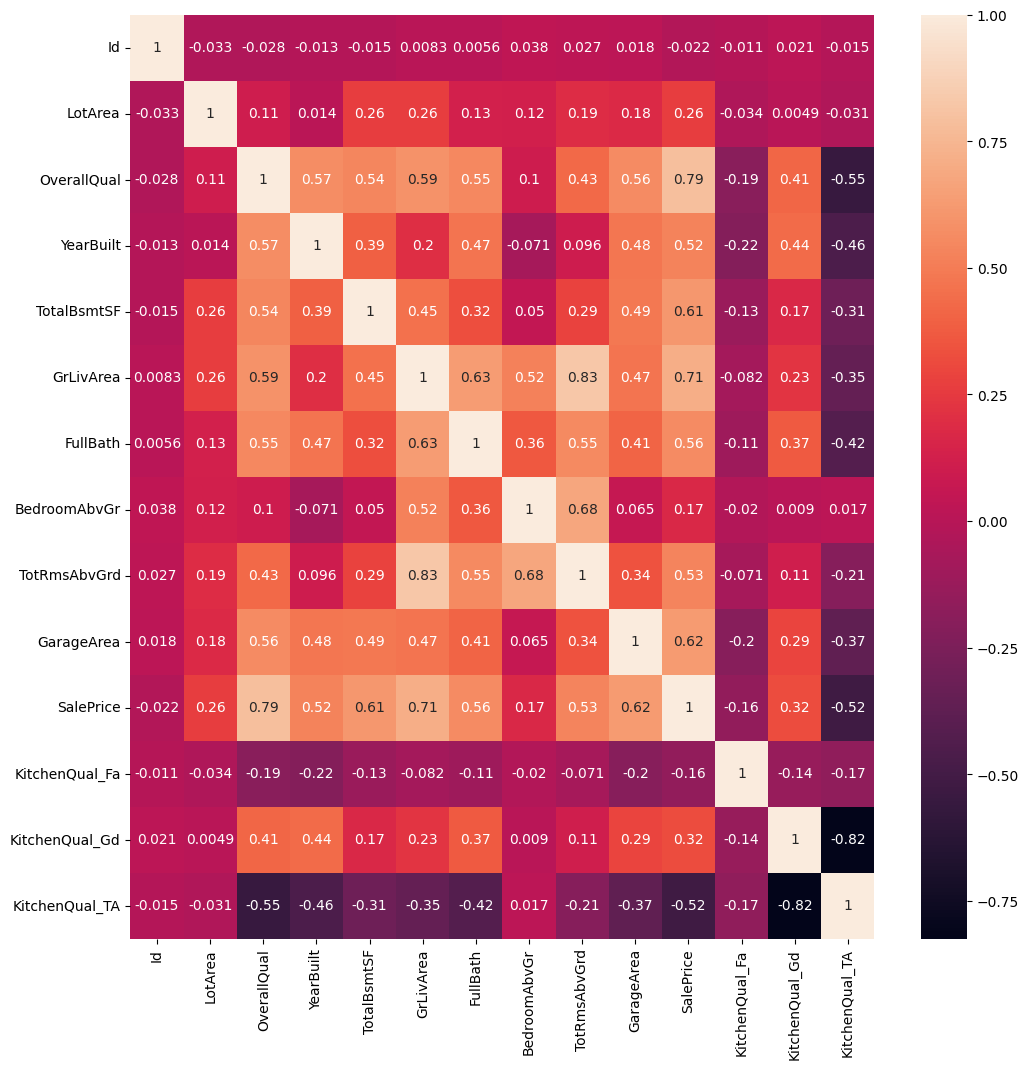

In [333]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

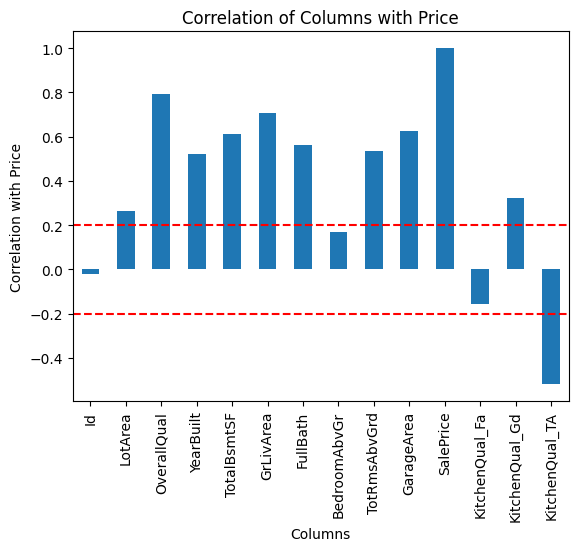

In [336]:
plot = data.corr()['SalePrice'].plot(kind='bar')
plot.axhline(y=0.2, color='r', linestyle='--')
plot.axhline(y=-0.2, color='r', linestyle='--')

# Adding labels and title
plt.xlabel('Columns')
plt.ylabel('Correlation with Price')
plt.title('Correlation of Columns with Price')

# Show the plot
plt.show()

In [337]:
data.columns

Index(['Id', 'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA'],
      dtype='object')

In [339]:
x = data.drop(columns=['SalePrice','KitchenQual_Fa','BedroomAbvGr'])

In [342]:
y = data['SalePrice']

In [343]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=23)

In [344]:
model = LinearRegression()

In [345]:
model.fit(x_train,y_train)

LinearRegression()

In [346]:
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [347]:
plot_data = pd.DataFrame({"Actual_Value":y_test,"Predicted_Value":y_pred}).reset_index().drop(columns='index')

Text(0.5, 1.0, 'Actual vs Predicted Values')

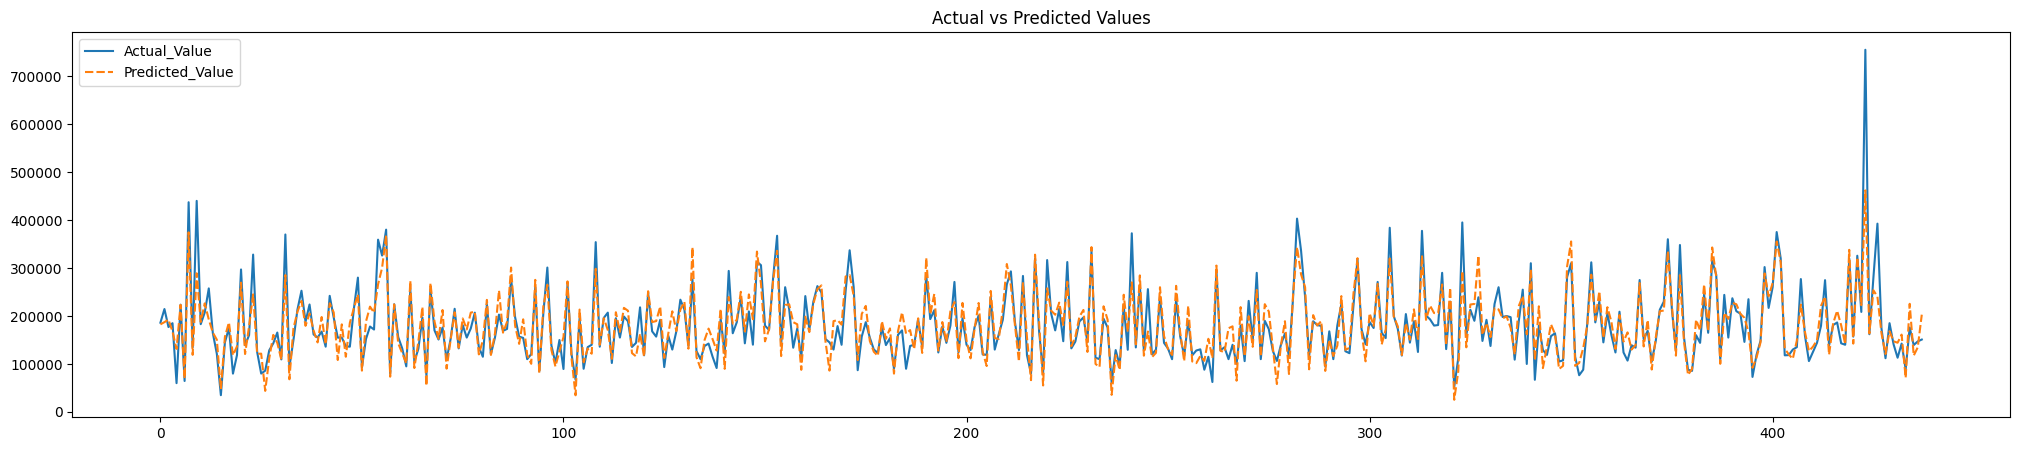

In [348]:
plt.figure(figsize=(25,5))
# data.plot(kind='line')
sns.lineplot(plot_data)
plt.title("Actual vs Predicted Values")

In [350]:
print("Accuracy of Model on Training data : ",r2_score(y_train,y_pred_train))
print("Accuracy of Model is Testing data : ",r2_score(y_test,y_pred))

Accuracy of Model on Training data :  0.7746652437606592
Accuracy of Model is Testing data :  0.8168424733871873


<center><img src="../../../images/linear_regression_types.png" alt="linear_regression" width="1000"/></center>

# Ridge Regression with Parameter Tuning 

In [351]:
from sklearn.linear_model import Ridge

In [352]:
kfold = KFold(n_splits=5)

In [353]:
ridge = Ridge()

In [354]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [355]:
param = {"alpha":np.linspace(0.01,0.99,1),
         'solver':['auto', 'svd']}

In [356]:
Rid_gcv = GridSearchCV(ridge,param_grid=param,cv=kfold,verbose=2,scoring='r2')

In [357]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=23)

In [358]:
Rid_gcv.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ............................alpha=0.01, solver=auto; total time=   0.0s
[CV] END ............................alpha=0.01, solver=auto; total time=   0.0s
[CV] END ............................alpha=0.01, solver=auto; total time=   0.0s
[CV] END ............................alpha=0.01, solver=auto; total time=   0.0s
[CV] END ............................alpha=0.01, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.01, solver=svd; total time=   0.0s
[CV] END .............................alpha=0.01, solver=svd; total time=   0.0s
[CV] END .............................alpha=0.01, solver=svd; total time=   0.0s
[CV] END .............................alpha=0.01, solver=svd; total time=   0.0s
[CV] END .............................alpha=0.01, solver=svd; total time=   0.0s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Ridge(),
             param_grid={'alpha': array([0.01]), 'solver': ['auto', 'svd']},
             scoring='r2', verbose=2)

In [359]:
print(Rid_gcv.best_params_)
print(Rid_gcv.best_score_)

{'alpha': np.float64(0.01), 'solver': 'auto'}
0.7395160602591121


In [360]:
rid_model = Rid_gcv.best_estimator_

In [361]:
rid_pred = rid_model.predict(x_test)
rid_pred_train = rid_model.predict(x_train)

In [362]:
print("Accuracy of Model on Training data : ",r2_score(y_train,rid_pred_train))
print("Accuracy of Model is Testing data : ",r2_score(y_test,rid_pred))

Accuracy of Model on Training data :  0.7746652425736937
Accuracy of Model is Testing data :  0.8168455213141417


In [363]:
plot_data = pd.DataFrame({"Actual_Value":y_test,"Predicted_Value":rid_pred}).reset_index().drop(columns='index')

Text(0.5, 1.0, 'Actual vs Predicted Values')

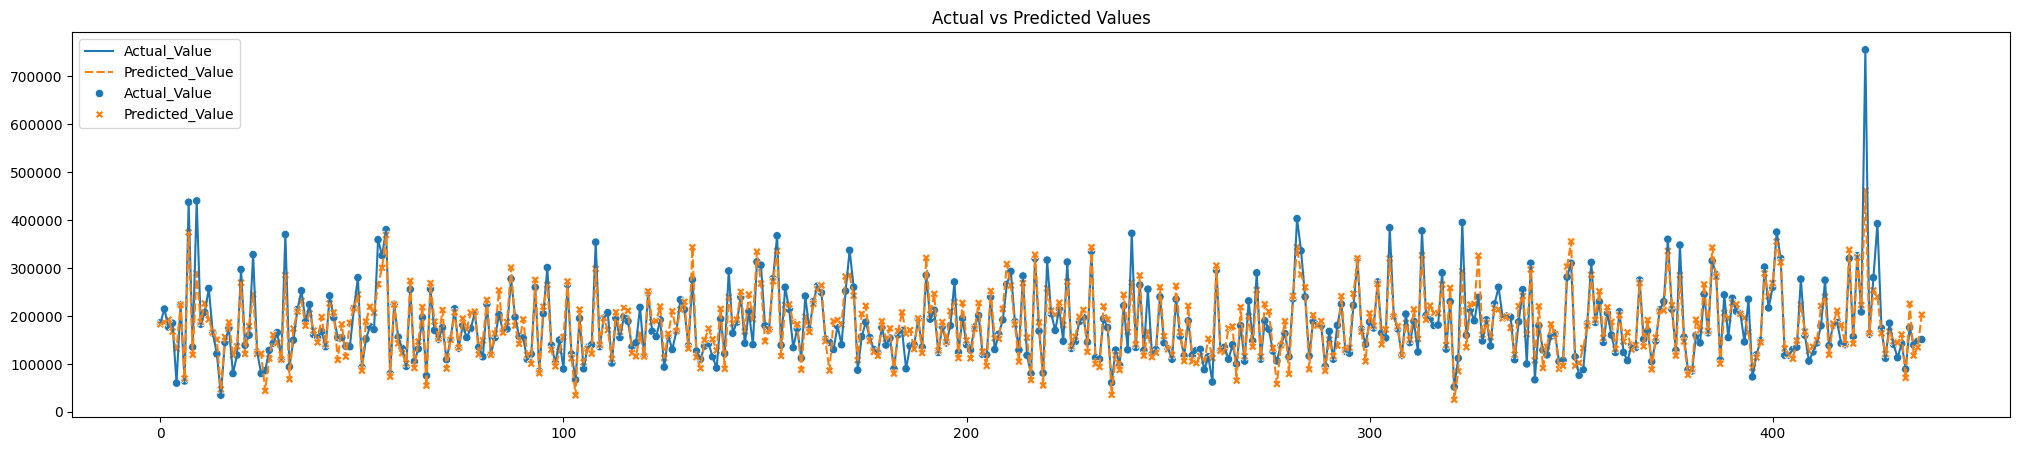

In [364]:
plt.figure(figsize=(25,5))
# data.plot(kind='line')
sns.lineplot(plot_data)
sns.scatterplot(plot_data)
plt.title("Actual vs Predicted Values")

# Lasso Regression

In [365]:
from sklearn.linear_model import Lasso

In [366]:
kfold = KFold(n_splits=5,shuffle=True,random_state=23)

In [367]:
lasso = Lasso()

In [368]:
param = {"alpha":[0.001,0.01,0.1,1]}

In [369]:
Las_gcv = GridSearchCV(lasso,param_grid=param,cv=kfold,verbose=2,scoring='r2')

In [370]:
Las_gcv.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ........................................

GridSearchCV(cv=KFold(n_splits=5, random_state=23, shuffle=True),
             estimator=Lasso(), param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             scoring='r2', verbose=2)

In [371]:
print(Las_gcv.best_params_)
print(Las_gcv.best_score_)

{'alpha': 1}
0.7439921659309725


In [372]:
las_model = Las_gcv.best_estimator_

In [373]:
las_pred = las_model.predict(x_test)
las_pred_train = las_model.predict(x_train)

In [374]:
print("Accuracy of Model on Training data : ",r2_score(y_train,las_pred_train))
print("Accuracy of Model is Testing data : ",r2_score(y_test,las_pred))

Accuracy of Model on Training data :  0.7746652346695642
Accuracy of Model is Testing data :  0.8168521890741596


In [375]:
plot_data = pd.DataFrame({"Actual_Value":y_test,"Predicted_Value":las_pred}).reset_index().drop(columns='index')

Text(0.5, 1.0, 'Actual vs Predicted Values')

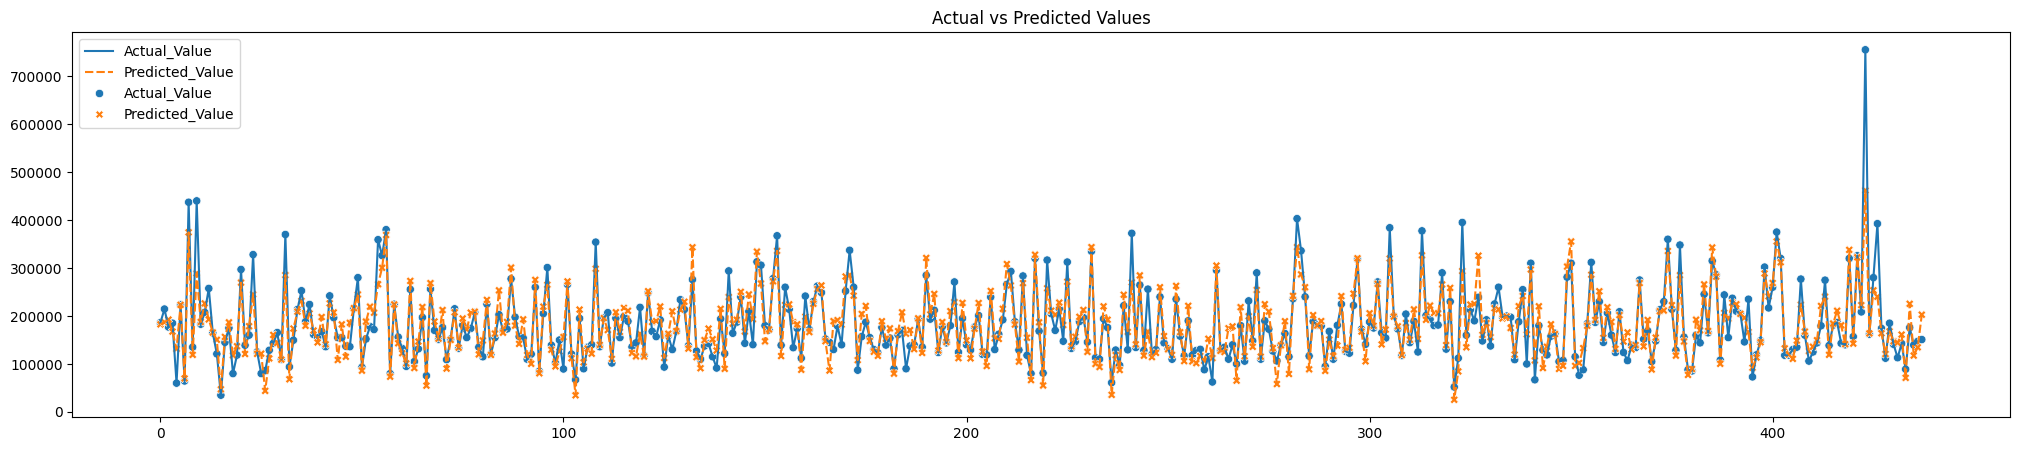

In [376]:
plt.figure(figsize=(25,5))
# data.plot(kind='line')
sns.lineplot(plot_data)
sns.scatterplot(plot_data)
plt.title("Actual vs Predicted Values")

# Elastic Net

In [377]:
from sklearn.linear_model import ElasticNet

In [378]:
kfold = KFold(n_splits=5,shuffle=True,random_state=23)

In [379]:
elastic = ElasticNet()

In [406]:
elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [419]:
param = {"alpha":np.linspace(0.01,1,10),"l1_ratio":np.linspace(0,1,10)}

In [420]:
elastic_gcv = GridSearchCV(elastic,param_grid=param,cv=kfold,verbose=1,scoring='r2')

In [421]:
elastic_gcv.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\DELL\anaconda3\envs\NeuralNet\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.287e+11, tolerance: 5.610e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL\anaconda3\envs\NeuralNet\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.543e+11, tolerance: 4.623e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers 

GridSearchCV(cv=KFold(n_splits=5, random_state=23, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             scoring='r2', verbose=1)

In [422]:
print(elastic_gcv.best_params_)
print(elastic_gcv.best_score_)

{'alpha': np.float64(0.01), 'l1_ratio': np.float64(0.1111111111111111)}
0.7446701612027129


In [423]:
els_model = elastic_gcv.best_estimator_

In [424]:
els_pred = els_model.predict(x_test)
els_pred_train = els_model.predict(x_train)

In [425]:
print("Accuracy of Model on Training data : ",r2_score(y_train,els_pred_train))
print("Accuracy of Model is Testing data : ",r2_score(y_test,els_pred))

Accuracy of Model on Training data :  0.7740217278905077
Accuracy of Model is Testing data :  0.8184196933953756


In [426]:
plot_data = pd.DataFrame({"Actual_Value":y_test,"Predicted_Value":els_pred}).reset_index().drop(columns='index')

Text(0.5, 1.0, 'Actual vs Predicted Values')

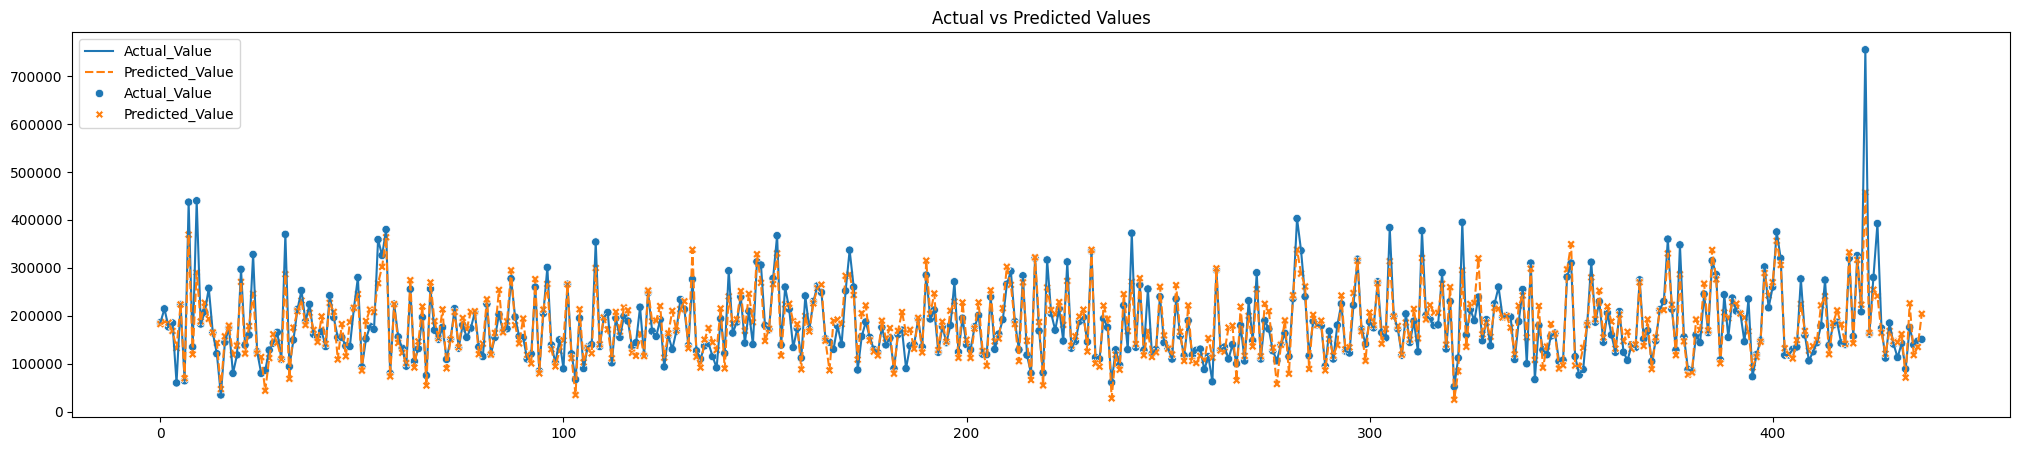

In [427]:
plt.figure(figsize=(25,5))
# data.plot(kind='line')
sns.lineplot(plot_data)
sns.scatterplot(plot_data)
plt.title("Actual vs Predicted Values")